# Bike Sharing Demand Prediction – Multiple Linear Regression

Task 2: Predict bike rental demand using multiple features:
- temp
- atemp
- hum
- windspeed


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load Dataset

In [2]:
DATA_PATH = "../bike-sharing-dataset/hour.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Feature and Target Selection

In [3]:
X = df[['temp', 'atemp', 'hum', 'windspeed']].values
y = df['cnt'].values

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (17379, 4)
Target vector shape: (17379,)


## Train Multiple Linear Regression Model

In [4]:
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(['temp', 'atemp', 'hum', 'windspeed'], model.coef_):
    print(f"  {feature}: {coef}")

Intercept: 161.80690218639518
Coefficients:
  temp: 85.57649678436802
  atemp: 314.3429289876896
  hum: -275.1803125384311
  windspeed: 42.97925524872406


## Predictions

In [5]:
y_pred = model.predict(X)

print("Sample predictions:")
for i in range(5):
    print(f"Actual: {y[i]}, Predicted: {int(y_pred[i])}")

Sample predictions:
Actual: 16, Predicted: 49
Actual: 40, Predicted: 46
Actual: 32, Predicted: 46
Actual: 13, Predicted: 66
Actual: 1, Predicted: 66


## Mean Squared Error

In [6]:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 24563.14


## Residual Plot

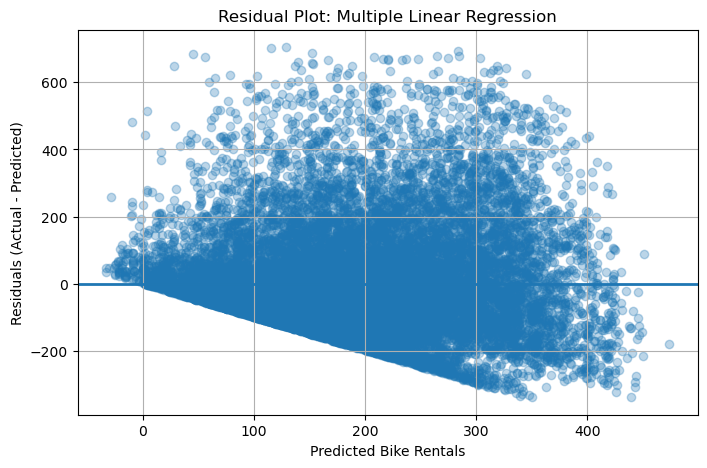

In [7]:
residuals = y - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, linewidth=2)
plt.xlabel("Predicted Bike Rentals")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Multiple Linear Regression")
plt.grid(True)
plt.show()